Chloe Chen
Updated: 2/28/2023


### Import packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

### Connect to MySQL Database

In [2]:
from connection import *

con = connect()

### TODO: why is the error popping up? doesn't affect function though

2023-03-16 11:36:08,610| ERROR   | Password is required for key /home/chloe/.ssh/id_rsa


Connection Successful


In [ ]:
# test
query = "show databases;"
SQL(query, con)

In [ ]:
# test
query = "test.sql"
SQL(query, con)

### Context

In [ ]:
## basic info, takes about 10 secs to load, filtered preliminary
query = "context_query.sql"
context_df = SQL(query, con)

In [ ]:
context_df.drop_duplicates()
context_df.head()

In [ ]:
## print out basic information
print("Number of patients: ", len(pd.unique(context_df["id"])))
print("Age groups: ", pd.unique(context_df["age_group"]))
print("disorders: ", pd.unique(context_df["disorder_id"])) ## potentially filter out more diseases
print("deficits: ", pd.unique(context_df["deficit_id"])) ## potentially filter out more deficits


In [ ]:
context_df.nunique()

In [ ]:
context_df["disorder_id"].value_counts()

In [ ]:
context_df_disorder = context_df.groupby(["id"])["disorder_id"].apply(set).reset_index()
context_df_disorder.head()

In [ ]:
context_df_disorder = context_df_disorder.explode("disorder_id")
context_df_disorder.head()

In [ ]:
sns.histplot(data=context_df_disorder, x="disorder_id")

In [ ]:
context_df_deficit = context_df.groupby(["id"])["deficit_id"].apply(set).reset_index()
context_df_deficit.head()

In [ ]:
context_df_deficit = context_df_deficit.explode("deficit_id")
context_df_deficit.head()

In [ ]:
sns.histplot(data=context_df_deficit, x="deficit_id")

In [ ]:
context_df["condition_since"] = context_df["condition_since"].apply(time_convert)

In [ ]:
context_df.head()

In [ ]:
context_df_time = context_df.drop_duplicates(subset="id")
context_df_time.head()

In [ ]:
print("Average time since onset: ", context_df_time["condition_since"].mean(), "month")
print("Median time since onset: ", context_df_time["condition_since"].median(), "month")
print("Mode of time since onset: ", context_df_time["condition_since"].mode(), "month")
print("Standard Deviation: ", context_df_time["condition_since"].std(), "month")
print("Variance: ", context_df_time["condition_since"].var(), "month")

In [ ]:
context_df_time.groupby("age_group").size().plot.pie(autopct='%1.1f%%')

In [ ]:
sns.boxplot(data=context_df_time, x="condition_since")

In [ ]:
sns.boxplot(data=context_df_time, x="condition_since", y="age_group")

In [ ]:
sns.histplot(data=context_df_time, x="condition_since")

In [ ]:
# takes

query = "select patient_id, completed_task_count from constant_therapy.sessions;"
task_count_data = SQL(query, con)
task_count_data.head()

In [ ]:
task_count_data = task_count_data.groupby("patient_id")["completed_task_count"].sum().reset_index()

In [ ]:
task_count_data.head()

In [ ]:
print(task_count_data["completed_task_count"].max())

Context VS Action

In [3]:
query = "combined_query.sql"
action_df = SQL(query, con)

KeyboardInterrupt: 

In [18]:
action_df = SQL("select * from q3;", con)
action_df.head()

,user_id,condition_since,age_group,deficit_id,disorder_id,completed_task_count,task_type_id,task_level,accuracy,is_baseline
0,4987,5y,>70,6.0,3.0,10.0,53.0,3.0,0.640,0.0
1,4987,5y,>70,6.0,3.0,10.0,53.0,3.0,0.614,0.0
2,4987,5y,>70,6.0,3.0,10.0,53.0,3.0,0.603,0.0
3,4987,5y,>70,6.0,3.0,9.0,53.0,3.0,0.642,0.0
4,4987,5y,>70,6.0,3.0,6.0,53.0,3.0,0.655,0.0


In [19]:
action_df.nunique()

user_id                   1
condition_since           1
age_group                 2
deficit_id                2
disorder_id               1
completed_task_count    110
task_type_id             62
task_level                8
accuracy                640
is_baseline               2
dtype: int64

<Axes: xlabel='accuracy'>

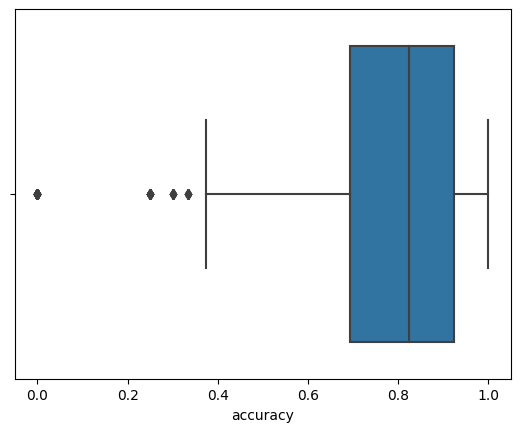

In [7]:
sns.boxplot(data=action_df, x="accuracy")

<Axes: xlabel='task_level', ylabel='Count'>

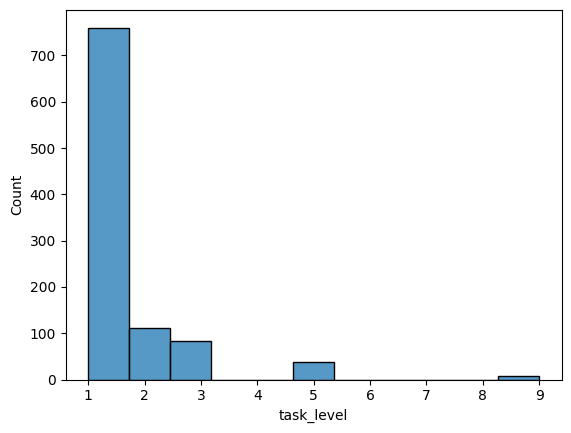

In [9]:
sns.histplot(data=action_df, x="task_level")

In [11]:
action_df["task_type_id"].value_counts()

79       126
43        70
23        70
133       63
15        56
162       49
31        49
27        42
37        35
11        30
10        30
46        28
52        21
48        21
45        21
55        21
18        15
44        14
56        14
49        14
32        14
5         14
42         7
73         7
253        7
229        7
207        7
167        7
135        7
20         7
130        7
94         7
87         7
21         7
76         7
72         7
34         7
70         7
68         7
67         7
65         7
22         7
25         7
54         7
53         7
26         7
33         7
47         7
10001      1
Name: task_type_id, dtype: int64

<Axes: >

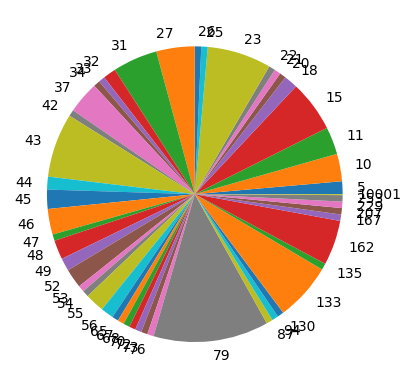

In [14]:
action_df.groupby("task_type_id").size().plot.pie()

### Basic plots

In [ ]:
query = "select * from domain_scores;"
data = SQL(query, con)

In [ ]:
domain_groups = data.groupby("domain_id")
domain_groups["baseline_domain_score"].mean().sort_values()

In [ ]:
query = "select * from before_after_v2;"
data = SQL(query, con)

In [ ]:
data["acc_diff"] = data["after_accuracy_avg"] - data["before_accuracy_avg"]
data["acc_diff"].mean()

In [ ]:
data["lat_diff"] = data["after_log_latency_avg"] - data["before_log_latency_avg"]
data["lat_diff"].mean()

In [ ]:
print(data["completed_task_count"].mean())
sns.boxplot(data = data, x = "completed_task_count")

In [ ]:
disorder_data = data.groupby("disorder_id")
disorder_data.size().plot.pie(autopct='%1.1f%%')

In [ ]:
data.head()

In [ ]:
# borrowing Claire's table for now, takes around 3.5 mins
query = "select * from q3;"
data = SQL(query, con)

In [ ]:
data.head()

In [ ]:
## current accuracy

sns.boxplot(data=data, x="accuracy")

In [ ]:
## current task levels

tl_data = data.groupby("task_level")
tl_data.size().plot.pie()